<a href="https://colab.research.google.com/github/abhicse002/Django-REST/blob/master/ann_practial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aakash50897/churn-modellingcsv")

print("Path to dataset files:", path)

100%|██████████| 262k/262k [00:00<00:00, 806kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/aakash50897/churn-modellingcsv/versions/1


In [4]:
# Assuming the downloaded file is named 'Churn_Modelling.csv'
df = pd.read_csv(f'{path}/Churn_Modelling.csv')

# Display the first few rows of the DataFrame
display(df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Step 3: Remove innecessary Data
df= df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [6]:
# Encoding
df['Geography'].unique()
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [7]:
df['Geography'] = df['Geography'].map({'France': 0, 'Germany': 1, 'Spain': 2})

In [8]:
df


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,850,2,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,0,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,1,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df.value_counts()

CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
850          2          1       37   4       137204.77  1              1          1               28865.59         0         1
                                             88141.10   1              1          0               109659.12        0         1
                                     2       0.00       2              1          0               119969.99        0         1
                                36   6       0.00       2              0          1               41291.05         0         1
                                     0       0.00       2              1          0               141242.57        0         1
                                                                                                                            ..
350          2          1       54   1       152677.48  1              1          1               191973.49        1         1
             1          1       39   0       109733.20  2              0          0               123602.11        1         1
             0          1       51   10      0.00       1              1          1               125823.79        1         1
                        0       60   3       0.00       1              0          0               113796.15        1         1
                                40   0       111098.85  1              1          1               172321.21        1         1
Name: count, Length: 10000, dtype: int64

In [10]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [11]:
# Split data
X = df.drop('Exited', axis=1)
y = df['Exited']



X_train, X_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Scaling
scalar= StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_text)


In [13]:
input_len = len(X_train.columns)

In [27]:
# Step 7 Neural N/W

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

# Input will be fed Sequentially

# 1. Instantiate
model = Sequential()

# 2. Add Layer to the model

# First Layer = 6 Neurons, and input is fed
model.add(Dense(units=6,activation='relu', input_shape=(10,)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
#we can add or not add Batch Normalization & Dropout in between.

# For Advanced Layers implementation Define & Add below things
# 1. Early Stopping
# 2. Monitor Validation Loss
# 3. Patience - is allows us to continue or abort based on the last successive last patience value
# 4. Best weight value - goes thru the prevous batch values and finds weight for the min val_loss

model.add(Dense(units=6, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#we can add or not add Batch Normalization & Dropout in between.

model.add(Dense(units=1, activation='sigmoid')) # Output Layer shud be only one, also since output shud be binary


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Optimizer helps models to Run
# helps to learn & converge
# Loss fucntion - how much we are off from actual value
# Binary cross entropy  is suitable for binary outcome,
# metrics incase of classition can be accuracy

# Epoch - Number of times it can move forward & backward to get the gloabl minima
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [16]:
# train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6447 - loss: 0.6643 - val_accuracy: 0.8035 - val_loss: 0.5072
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7934 - loss: 0.4989 - val_accuracy: 0.8040 - val_loss: 0.4572
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8016 - loss: 0.4594 - val_accuracy: 0.8155 - val_loss: 0.4322
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8054 - loss: 0.4403 - val_accuracy: 0.8220 - val_loss: 0.4175
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8218 - loss: 0.4229 - val_accuracy: 0.8235 - val_loss: 0.4088
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8214 - loss: 0.4182 - val_accuracy: 0.8295 - val_loss: 0.4028
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8194 - loss: 0.4202 - val_accuracy: 0.8285 - val_loss: 0.3973
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8233 - loss: 0.4078 - val_accuracy: 0

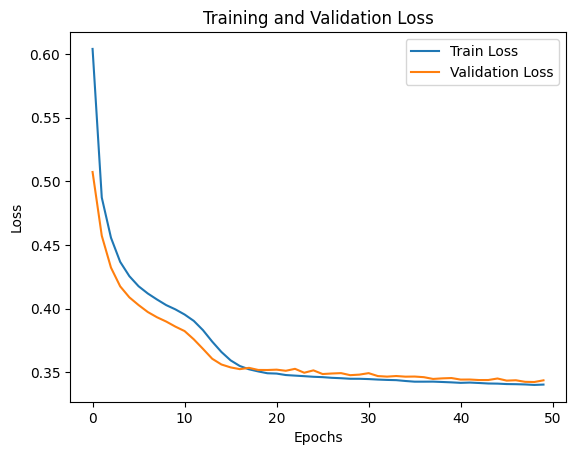

In [17]:
# plot training results

plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.title('Training and Validation Loss')

plt.legend()
plt.show()



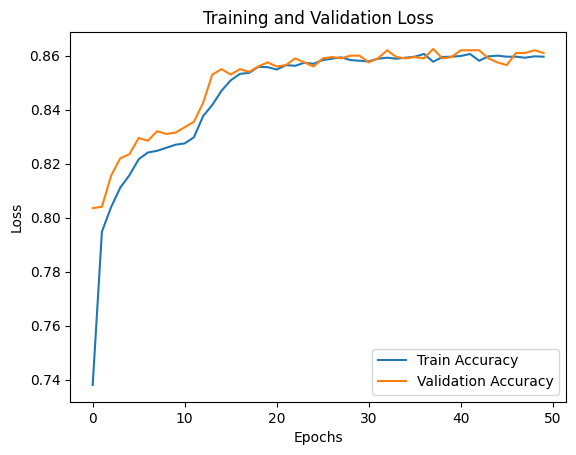

In [18]:
# plot training results

plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.title('Training and Validation Loss')

plt.legend()
plt.show()

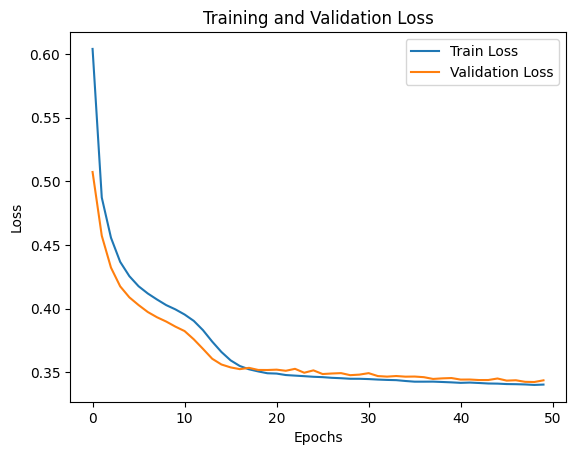

In [19]:
# plot training results

plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.title('Training and Validation Loss')

plt.legend()
plt.show()

In [20]:
# Prediction for new customer



In [21]:
# early stopping, Batch normalization, Dropout

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping


early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weight=True
)

TypeError: EarlyStopping.__init__() got an unexpected keyword argument 'restore_best_weight'